# COVID-19 Machine Learning Dataset®

>Adopted from the dataset provided by Dr. Karandeep Singh [@kdpsinghlab](https://twitter.com/kdpsinghlab/status/1239416911668092928)

The goal of this case study (intended for education) is to **predict the urgency** with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms.

The original dataset is located on this [github repo](https://github.com/ml4lhs/covid19_ml_education/raw/master/covid_ml.csv) and has been simplified for this case study

The raw data comes from the following [source](http://virological.org/t/epidemiological-data-from-the-ncov-2019-outbreak-early-descriptions-from-publicly-available-data/337).

## Intended For Educational Use Only
## Should this data be used for research?

No. Students working with this dataset should understand that both the source data and the ML data have several limitations:
- The source data is crowdsourced and may contain inaccuracies.
- There may be duplicate patients in this dataset
- There is a substantial amount of missingness in the symptoms data.

## **And most importantly:**
- The entire premise is flawed. The fact that a patient was admitted the same day as experiencing symptoms may have more to do with the availability of hospital beds as opposed to the patient's acuity of illness.
- Also, the fact that less sick patients or asymptomatic patients may not have been captured in the source dataset mean that the probabilities estimated by any model fit on this data are unlikely to reflect reality.

**Primary predictors:**
- age (if an age range was provided in the source data, only the first number is used)
- sex
- cough, fever, chills, sore_throat, headache, fatigue (all derived from the symptoms column using regular expressions)

>The goal of the exercise is to make a classification model to predict the **urgency_of_admission** based on the following criteria
1. 0-1 days from onset of symptoms to admission => High
2. 2+ days from onset of symptoms to admission *or* no admission => Low
  

The goal of this case study (intended for education) is to **predict the urgency** with which a COVID-19 patient will need to be admitted to the hospital from the time of onset of symptoms

The original dataset is located on this [github repo](https://github.com/ml4lhs/covid19_ml_education/raw/master/covid_ml.csv) and has been simplified for this case study

The raw data comes from the following source: http://virological.org/t/epidemiological-data-from-the-ncov-2019-outbreak-early-descriptions-from-publicly-available-data/337

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
# %matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

## Calling the dataset
>We are using a modified dataset found here [covid_19 dataset source](Link)

Following changes were made:
1. Categorical values changed to 1 and 0
2. Used SMOTE to upsample in order to balance the dataset

In [2]:
# We first read the data and take a quick look
df = pd.read_csv('covid_train.csv')
df_test = pd.read_csv('covid_test.csv')
df_test.head()

,age,sex,cough,fever,chills,sore_throat,headache,fatigue,Urgency
0,47,0,0,0,0,0,0,0,0
1,42,0,0,1,0,0,0,0,1
2,21,1,0,0,0,0,0,0,1
3,41,1,0,0,0,0,0,0,1
4,43,1,0,1,0,0,0,0,0


In [3]:
#Now we separate the dependent and independent variables as 'X' and 'y'                         
X_train, y_train = df.drop(['Urgency'],axis=1), df['Urgency']   
X_test, y_test = df_test.drop(['Urgency'],axis=1), df_test['Urgency']

## GridsearchCV for Logistic Regression
>Below we do a hyper-parameter search to get the best C value for Logistic Regression
>> For simplicity, We will use the **Accuracy** as a scorer metric to choose best hyper-parameter

In [4]:
#Defining a useful function that takes a set of hyper-parameters and gives us the best option
def best_classifier(clf, params, X,y, n_folds = 5):
    gs = GridSearchCV(clf, param_grid = params, cv=n_folds)
    gs.fit(X,y)
    print("BEST", gs.best_params_, round(gs.best_score_,2))
    best = gs.best_estimator_
    return best

In [5]:
#Tuning for Logistic regression
logreg = LogisticRegression(solver= 'lbfgs', max_iter=10000)
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Finding the best value of C
best = best_classifier(logreg, c_values,X_train, y_train, n_folds = 5)

BEST {'C': 0.1} 0.61


## Fitting the data and making predictions

>We will also calculate the accuracy and display the confusion matrix

In [6]:
logreg = LogisticRegression(max_iter=10000,solver = 'lbfgs',C=0.1)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

cm_test

print(f'Accuracy for test set for Logistic Regression = {(cm_test[0][0] + cm_test[1][1])/len(y_test):.2f}')

Accuracy for test set for Logistic Regression = 0.62


## GridsearchCV for KNN classification
>Below we do another hyper-parameter search to get the best C value for KNN Classification
>> For simplicity, We will use the **Accuracy** as a scorer metric to choose best hyper-parameter

In [7]:
knnreg = KNeighborsClassifier()
k_vals = np.arange(1,50,3)
n_vals = {"n_neighbors": k_vals}

In [8]:
best = best_classifier(knnreg, n_vals, X_train, y_train, n_folds = 5)

BEST {'n_neighbors': 10} 0.65


## Fitting the data and making predictions

>We will also calculate the accuracy and display the confusion matrix

In [9]:
knnreg = KNeighborsClassifier(n_neighbors=7)
knnreg.fit(X_train, y_train)

y_kpred = knnreg.predict(X_test)

cmk_test = confusion_matrix(y_test, y_kpred)

cmk_test

print(f'Accuracy for test set for K-nn classification = {(cmk_test[0][0] + cmk_test[1][1])/len(y_test):.2f}')

Accuracy for test set for K-nn classification = 0.63


## What is the confusion Matrix?

 A classifier will get some samples right, and some wrong. Generally we see which ones it gets right and which ones it gets wrong on the test set
 
 ![hwimages](https://covid19.posts.ai/assets/confusionmatrix.png)
 

### True Positive
- Samples that are +ive and the classifier predicts as +ive are called True Positives (TP)

### False Positive
- Samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP)

### True Negative
- Samples that are -ive and the classifier predicts as -ive are called True Negatives (TN)

### False Negative
- Samples that are +ive and the classifier predicts as -ive are called False Negatives (FN)

# <ins>The boy who cried wolf: Data Science edition</ins>

## Predicted wolf, but no wolf 
<div style="text-align:center"><img src="https://github.com/hargun3045/blog-dump/blob/master/images/False+.jpeg?raw=true" /></div>

## Predicted no wolf, but actually wolf
<div style="text-align:center"><img src="https://github.com/hargun3045/blog-dump/blob/master/images/False-.jpeg?raw=true" /></div>

Text(0.5, 1.0, 'KNN Confusion Matrix')

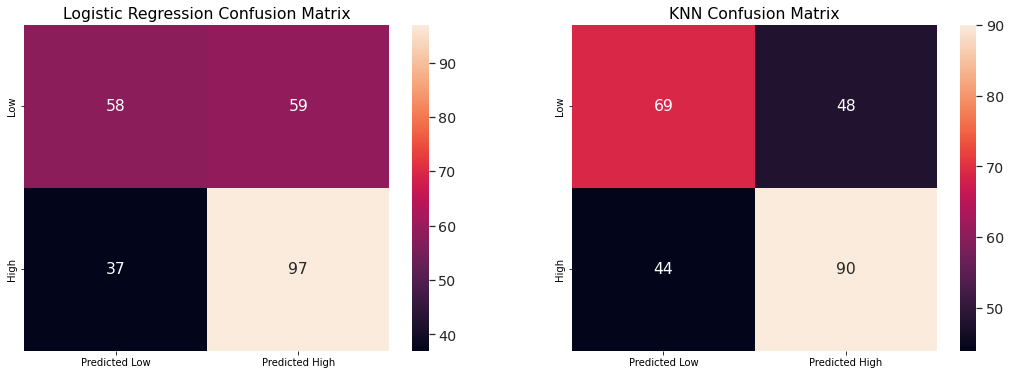

In [10]:
# Making a more demonstrative plot for confusion matrix
# import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(18,6))

dfk_cm = pd.DataFrame(cmk_test, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])
df_cm = pd.DataFrame(cm_test, index = ['Low','High'],columns = ['Predicted Low','Predicted High'])

sns.set(font_scale=1.3)
sns.heatmap(df_cm.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes[0])
axes[0].set_ylim([0,2]);
axes[0].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(dfk_cm.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes[1])
axes[1].set_ylim([0,2]);
axes[1].set_title('KNN Confusion Matrix');

## **Sensitivity**

The **Sensitivity**, also known as **Recall** or **True Positive Rate(TPR)**


$$TPR = Recall = \frac{TP}{OP} = \frac{TP}{TP+FN},$$

also called the **Hit Rate**: the fraction of observed positives (1s) the classifier gets right, or how many true positives were recalled. Maximizing the recall towards 1 means keeping down the false negative rate

In [11]:
# Sensitivity computation using the confusion matrix
recall = (cm_test[1][1])/cm_test.sum(axis=1)[1]

knn_recall = (cmk_test[1][1])/cmk_test.sum(axis=1)[1]

print(f'True Positive Rate (Recall) for Logistic Regression = {100*round(recall,2)} %')

print(f'True Positive Rate (Recall) for KNN = {100*round(knn_recall,2)} %')

True Positive Rate (Recall) for Logistic Regression = 72.0 %
True Positive Rate (Recall) for KNN = 67.0 %


## **Specificity**
The **Specificity** or **True Negative Rate** is defined as

$$TNR = \frac{TN}{ON} = \frac{TN}{FP+TN}$$

In [12]:
# Specificity computation using the decision matrix

fpr = (cm_test[0][1])/cm_test.sum(axis=1)[0]

knn_fpr = (cmk_test[0][1])/cmk_test.sum(axis=1)[0]

print(f'False Positive Rate for Logistic Regression = {100*round(fpr,2)} %')
print(f'False Positive Rate for KNN = {100*round(knn_fpr,2)} %')

False Positive Rate for Logistic Regression = 50.0 %
False Positive Rate for KNN = 41.0 %


## **Precision** (Positive Predicted Value)

**Precision**,tells you how many of the predicted positive(1) hits were truly positive

$$Precision = \frac{TP}{PP} = \frac{TP}{TP+FP}.$$

In [13]:
# Precision computation using the confusion matrix

precision = (cm_test[1][1])/cm_test.sum(axis=0)[1]
knn_precision = (cmk_test[1][1])/cmk_test.sum(axis=0)[1]

print(f'Precision Rate for Logistic Regression = {100*precision:0.2f} %')
print(f'Precision Rate for KNN = {100*knn_precision:0.2f} %')

Precision Rate for Logistic Regression = 62.18 %
Precision Rate for KNN = 65.22 %


## **F1 score**
**F1** score gives us the Harmonic Mean of Precision and Recall.
It tries to minimize both **false positives** and **false negatives** simultaneously

$$F1 =  \frac{2*Recall*Precision}{Recall + Precision}$$

In [14]:
# F1 score using confusion matrix

f1_score = (2*precision*recall)/(recall+precision)

knn_f1_score = (2*knn_precision*knn_recall)/(knn_recall+knn_precision)

print(f'F1 score for Logistic Regression = {100*round(f1_score,2)} %')
print(f'F1 score for KNN = {100*round(knn_f1_score,2)} %')

F1 score for Logistic Regression = 67.0 %
F1 score for KNN = 66.0 %


In [15]:
from pprint import pprint

In [16]:
print(classification_report(y_test,logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.50      0.55       117
           1       0.62      0.72      0.67       134

    accuracy                           0.62       251
   macro avg       0.62      0.61      0.61       251
weighted avg       0.62      0.62      0.61       251



In [17]:
print(classification_report(y_test,knnreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       117
           1       0.65      0.67      0.66       134

    accuracy                           0.63       251
   macro avg       0.63      0.63      0.63       251
weighted avg       0.63      0.63      0.63       251



## Bayes Theorem & Diagnostic testing

Refer to Rahul's [Covid19 Serological testing blog](https://covid19.posts.ai/2020/04/04/bayes-rule-and-serological-testing.html) for an excellent introduction to all the above concepts.

In [18]:
# Area under the roc curve

y_pred = logreg.predict(X_test)
y_kpred = knnreg.predict(X_test)

#logreg_roc_auc = roc_auc_score(y_test,logreg.predict(X_test))
logreg_auc = roc_auc_score(y_test,y_pred)
#knn_roc_auc = roc_auc_score(y_test,knnreg.predict(X_test))
knnreg_auc = roc_auc_score(y_test,y_kpred)

## ROC Curve

To make a ROC curve you plot the True Positive Rate, against the False Positive Rate,

The curve is actually a 3 dimensional plot, which each point representing a different value of threshold.

![ROC](https://github.com/hargun3045/blog-dump/blob/master/pavloss6/roc-curve.png?raw=true)


In [19]:
def plot_roc(test,logprobs,knnprobs,axis):
    fpr, tpr, thresholds = roc_curve(test, logprobs)
    kfpr, ktpr, kthresholds = roc_curve(test, knnprobs)
    ax.plot(fpr, tpr, label=f'Logistic Regression (area = {logreg_auc:.2f})', color = 'b')
    ax.plot(kfpr, ktpr, label=f'KNN (area = {knnreg_auc:.2f})', color = 'g')  
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.4,
    )
    #
#     for k in range(0, fpr.shape[0],10):
#         #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
#         threshold = str(np.round(thresholds[k], 2))
#         ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)

#     for k in range(1, kfpr.shape[0]):
#         #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
#         threshold = str(np.round(kthresholds[k], 2))
#         ax.annotate(threshold, (kfpr[k], ktpr[k]),color='r', **label_kwargs)

    ax.plot([0, 1], [0, 1],'r--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    ax.legend(loc="lower right")


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


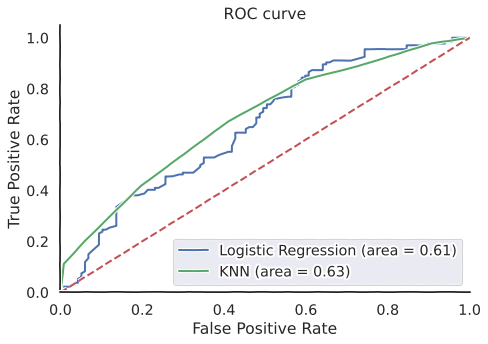

In [20]:
#ROC Curve values
# plt.style.use('seaborn-white')
plt.xkcd(randomness=0,scale=0.1)
y_probs = logreg.predict_proba(X_test)[:,1]
y_kprobs = knnreg.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize = (7,5))
fig.patch.set_facecolor('None')
fig.patch.set_alpha(0)
plot_roc(y_test,y_probs,y_kprobs,ax)
[ax.spines[key].set_visible(False) for key in ax.spines.keys() if key not in ['bottom','left']];
ax.patch.set_facecolor('None')
ax.patch.set_alpha(0)
plt.tight_layout()


# Which classifier to choose?

## Choice of classifier Scenario 1 - Brazil

<img src="https://i.ibb.co/yd61BP8/Screen-Shot-2021-07-11-at-9-37-55-AM.png" alt="drawing" width="500"/>

>**It's the month of April, and Brazilian authorities take note of a contagious novel virus that spreads easily between people and is ten times more lethal than the common flu.**

>>*Brazilian officials however dictate that hospitals do not classify a large number of people at 'high' risk to avoid bad press and subsequent political global backlash**

**In numbers we need the best classifier with the following restriction**

$$TPR + FPR \le 0.5$$     


## Choice of classifier Scenario 2 - GERMANY

<img src="https://github.com/hargun3045/blog-dump/blob/master/pavloss6/Germany.png?raw=true" alt="drawing" width="500"/>

>**It's the month of February, and Germany, is now aware that the pandemic of Covid-19 has severely hit Europe. Italy is already decimated and there is suspected spread to other European nations as well**

>> German officials have a clear target. The want the fatality ratio to be as less as possible. Thus, it is imperative to find cases in need of urgent attention and give them the best chance of survival.

**In numbers we need the best classifier with the following restriction**

$$ 0.8 \le TPR \le 0.85 $$

# Choice of classifier Scenario 3 - INDIA

<img src="https://github.com/hargun3045/blog-dump/blob/master/pavloss6/India.png?raw=true" alt="drawing" width="500"/>

>**It's the month of May, and India, now severly impacted by Covid-19, has now run a major shortage of hospital beds for suspected cases**

>> Owing to exponentially rising cases Indian officials cannot afford many **False Positives** to be given hospital beds. Hence, it is dictated that hospitals do not classify a large number of people at 'high' risk to avoid bed shortage for **At risk** patients

>> India has only 1 million beds left, and there are already 2 million people suspected of having the disease. The officials need to work out a strategy to find the people at most need of urgent care.

**In numbers we need the best classifier with the following restriction**

$$TP + FP = 1000000$$

$$TP = TPR*OP$$ $$FP = FPR*ON$$

$$TPR*OP + FPR*ON = 1000000$$

$$Assuming\ OP=ON = 500000$$

$$TPR + FPR \le 1 $$

## ROC curve with boundary conditions

/tmp/ipykernel_31/345079981.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  ax.plot([0,1],[1,0],'r--', linewidth=4 , color = 'blue',label = 'Scenario 3 - India ');
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


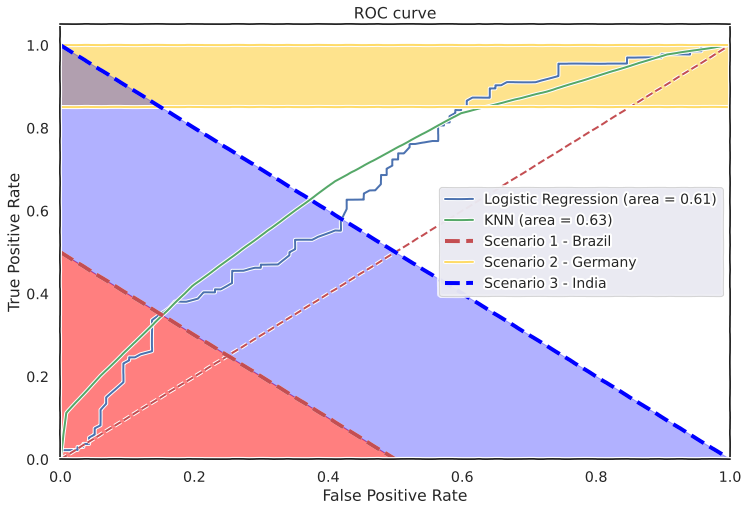

In [21]:
# Area under curve - Logistic regression & KNN

y_probs = logreg.predict_proba(X_test)[:,1]
y_kprobs = knnreg.predict_proba(X_test)[:,1]
fig, ax = plt.subplots(figsize = (12,8))
plot_roc(y_test,y_probs,y_kprobs,ax)

# Scenario 1 - Brazil

ax.plot([0,0.5],[0.5,0],'r--', linewidth=4, label = 'Scenario 1 - Brazil');
ax.fill_between([0,0.5],[0.5,0], color = 'red', alpha = 0.5);

#Scenario 2 - Germany

y1, y2 = 0.85,1
ax.axhline(y=y1, color = '#FEDB68', label = 'Scenario 2 - Germany');
ax.axhline(y=y2, color = '#FEDB68');
ax.axhspan(y1, y2, facecolor='#FEDB68', alpha=0.5);

#Scenario 3 - India

ax.plot([0,1],[1,0],'r--', linewidth=4 , color = 'blue',label = 'Scenario 3 - India ');
ax.fill_between([0,1],[1,0],[0.5,-0.5], alpha = 0.3, color = 'blue');
ax.set_xlim([0.0, 1.0]);
ax.set_ylim([0.0, 1.05]);
ax.legend(loc='center right',fontsize=14);
fig.patch.set_facecolor('None')
fig.patch.set_alpha(0)
ax.patch.set_facecolor('None')
ax.patch.set_alpha(0);